In [1]:
# ✅ PART 1: Import and Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Sina\Desktop\CODES\Sources\4(CHATGPT LABELED OF THE COURSE)\4(properties).csv")


In [3]:
# ✅ PART 2: Preprocess Numeric Features
num_features = ['Size_sqft', 'SalePrice']
num_data = df[num_features].fillna(0)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

In [4]:
# ✅ PART 3: Encode Categorical Feature (Use OneHot if MCA fails)
cat_df = pd.get_dummies(df[['Location']].fillna('Unknown'))

# ✅ PART 4: Combine Features
combined_df = pd.concat([pca_df.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)


In [5]:
# ✅ PART 5: DBSCAN Parameter Tuning with Silhouette Scores
eps_values = [0.3, 0.5, 0.6, 0.8, 1.0]
min_samples_values = [2, 3, 4, 5, 6]

print("\n🔎 Tuning DBSCAN Parameters:")
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(combined_df)
        if len(set(labels)) - (1 if -1 in labels else 0) > 1:
            sil_score = silhouette_score(combined_df[labels != -1], labels[labels != -1])
            print(f"eps={eps}, min_samples={min_samples} -> Clusters={len(set(labels)) - (1 if -1 in labels else 0)}, Silhouette={sil_score:.3f}")
        else:
            print(f"eps={eps}, min_samples={min_samples} -> Insufficient clusters")


🔎 Tuning DBSCAN Parameters:
eps=0.3, min_samples=2 -> Clusters=18, Silhouette=0.761
eps=0.3, min_samples=3 -> Clusters=6, Silhouette=0.781
eps=0.3, min_samples=4 -> Clusters=2, Silhouette=0.899
eps=0.3, min_samples=5 -> Insufficient clusters
eps=0.3, min_samples=6 -> Insufficient clusters
eps=0.5, min_samples=2 -> Clusters=20, Silhouette=0.503
eps=0.5, min_samples=3 -> Clusters=14, Silhouette=0.527
eps=0.5, min_samples=4 -> Clusters=9, Silhouette=0.615
eps=0.5, min_samples=5 -> Clusters=3, Silhouette=0.737
eps=0.5, min_samples=6 -> Clusters=2, Silhouette=0.843
eps=0.6, min_samples=2 -> Clusters=16, Silhouette=0.447
eps=0.6, min_samples=3 -> Clusters=14, Silhouette=0.467
eps=0.6, min_samples=4 -> Clusters=12, Silhouette=0.530
eps=0.6, min_samples=5 -> Clusters=9, Silhouette=0.528
eps=0.6, min_samples=6 -> Clusters=4, Silhouette=0.689
eps=0.8, min_samples=2 -> Clusters=4, Silhouette=0.150
eps=0.8, min_samples=3 -> Clusters=4, Silhouette=0.150
eps=0.8, min_samples=4 -> Clusters=5, Silhou

In [6]:
# ✅ PART 6: Final DBSCAN Run with Chosen Parameters
final_dbscan = DBSCAN(eps=0.6, min_samples=4)
final_labels = final_dbscan.fit_predict(combined_df)
combined_df['Cluster'] = final_labels

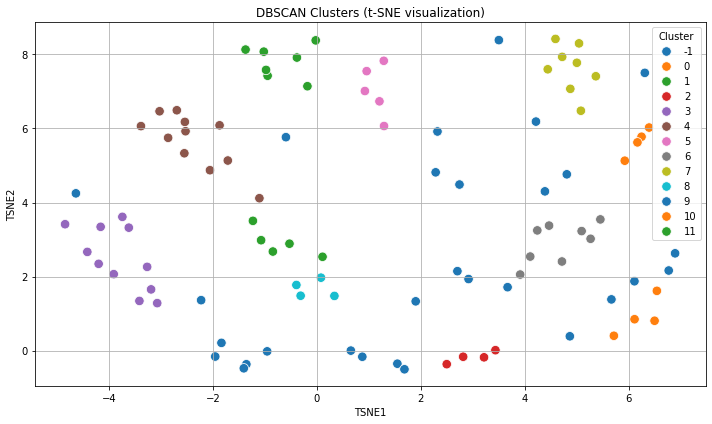

In [7]:
# ✅ PART 7: Visualize with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(combined_df.drop(columns='Cluster'))
combined_df['TSNE1'] = tsne_result[:, 0]
combined_df['TSNE2'] = tsne_result[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=90)
plt.title("DBSCAN Clusters (t-SNE visualization)")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [8]:
# ✅ PART 8: Noise Ratio
noise_ratio = (final_labels == -1).sum() / len(final_labels)
print(f"\n❗ Noise Points: {noise_ratio:.2%} of the dataset")



❗ Noise Points: 23.00% of the dataset
